## Viscosity effect in tracer transport along several cross-sections 

Transports across several cross sections in the domain (See plot further down)

Advective tracer transport $\Phi_{Tadv}=C\vec{u}\cdot\vec{a}$ from model output diagnostics.

Diffusive tracer transport $\Phi_{Tdiff}$ from model output (Includes diffusion due to advection scheme)

| variable  | dims | units | description |
|:---------:|:---------:|:---------:|:---------:|
| UTRAC01   |   (T, Zmd000090, Y, Xp1) | Mol/L.m/s | Zonal Mass-Weighted Transp of Tr1 |
| VTRAC01   |   (T, Zmd000090, Yp1, X) | Mol/L.m/s | Meridional Mass-Weighted Transp of Tr1 |
| WTRAC01   |   (T, Zmd000090, Y, X)   | Mol/L.m/s | Vertical Mass-Weighted Transp of Tr1 |  
| ADVrTr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Zonal Advective Flux of Tr1 |
| ADVxTr01  |   (T, Zmd000090, Y, Xp1) | Mol/L.m^3/s| Meridional Advective Flux of Tr1 |
| ADVyTr01  |   (T, Zmd000090, Yp1, X) | Mol/L.m^3/s| Vertical Advective Flux of Tr1 |
| DFrETr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Vertical Diffusive Flux of Tr1 (Explicit part) |
| DFrITr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Vertical Diffusive Flux of Tr1 (Implicit part) |
| DFxETr01  |   (T, Zmd000090, Y, Xp1) | Mol/L.m^3/s| Zonal Diffusive Flux of Tr1 |
| DFyETr01  |   (T, Zmd000090, Yp1, X) | Mol/L.m^3/s| Meridional Diffusive Flux of Tr1 |


In [1]:
import datetime as dtm      # Python's standard date and time library
import dateutil as dutil    # Powerful datetime extensions
import glob
from math import *
from matplotlib.dates import num2date
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
import xarray as xr


In [2]:
def calc_trac_transport_CS(flux_component, x_slice, y_slice, dim_name):
    '''
    INPUT:
    flux_component: xarray, flux component perpendicular to cross section (e.g. unstagger_xarray(flux38.V,'Yp1'))
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    dim_name: str, name of the dimension along which to sum.
    
    '''
    return (flux_component.isel(Yp1=y_slice, X=x_slice)).sum(dim=dim_name)

def calc_trac_transport_AS(flux_component, x_slice, y_slice, dim_name):
    '''
    INPUT:
    flux_component: xarray, Flux component perpendicular to cross section (e.g. unstagger_xarray(flux38.V,'Yp1'))
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    dim_name: str, name of the dimension along which to sum.
    
    '''
    return (flux_component.isel(Y=y_slice, Xp1=x_slice)).sum(dim=dim_name)
   

def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty

def fig_looks(ax, title = 'Cross-shelf transport'):
    '''define aesthetics of transport plots'''
    sns.set_style(style='whitegrid')
    sns.set_context('talk')

    ax.set_ylabel('tracer transport [$Mol/l.m^3s^{-1}$]')
    ax.set_xlabel('Time [$s$]')
    ax.legend(loc=0)
    ax.set_title(title)
    
    return(ax)
    

In [3]:
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
flux_file03 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc'
flux_file31 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run31/FluxTR01Glob.nc'
flux_file36 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run36/FluxTR01Glob.nc'
flux_file37 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run37/FluxTR01Glob.nc'
flux_file38 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'

gridNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
flux_file07 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/FluxTR01Glob.nc'
flux_file39 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run39/FluxTR01Glob.nc'
flux_file40 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run40/FluxTR01Glob.nc'
flux_file41 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run41/FluxTR01Glob.nc'
flux_file42 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/FluxTR01Glob.nc'

grid = xr.open_dataset(grid_file)
flux03 = xr.open_dataset(flux_file03)
flux31 = xr.open_dataset(flux_file31)
flux36 = xr.open_dataset(flux_file36)
flux37 = xr.open_dataset(flux_file37)
flux38 = xr.open_dataset(flux_file38)

gridNoC = xr.open_dataset(gridNoC_file)
flux07 = xr.open_dataset(flux_file07)
flux39 = xr.open_dataset(flux_file39)
flux40 = xr.open_dataset(flux_file40)
flux41 = xr.open_dataset(flux_file41)
flux42 = xr.open_dataset(flux_file42)


### Cross-sections

In [4]:
CS1_x_slice = slice(0, 59)
CS2_x_slice = slice(60, 119)
CS3_x_slice = slice(120, 239)
CS4_x_slice = slice(240, 299)
CS5_x_slice = slice(300, 359)

CS1_y_ind = 227
CS1b_y_ind = 267
CS1c_y_ind = 297
CS1d_y_ind = 359

AS1_y_slice = slice(227, 266)
AS2_y_slice = slice(267, 298)
AS3_y_slice = slice(299, 359)

AS1_x_ind = 59
AS1b_x_ind = 119
AS1c_x_ind = 239
AS1d_x_ind = 299

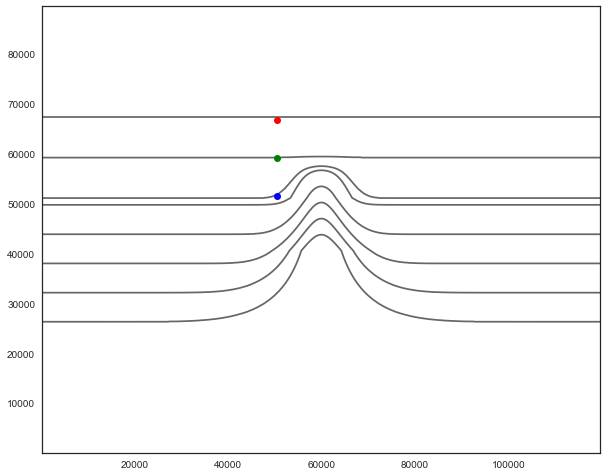

In [5]:
sns.set_style(style='white')
fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.contour(grid.X,grid.Y,grid.Depth,[50,100,150,200,400,600,800,1000], colors='0.4')
ax.plot(grid.X[120],grid.Y[227], 'bo')
ax.plot(grid.X[120],grid.Y[267], 'go')
ax.plot(grid.X[120],grid.Y[297], 'ro')

In [7]:
advCS1_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux31 = calc_trac_transport_CS(unstagger_xarray(flux31.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux31 = calc_trac_transport_CS(unstagger_xarray(flux31.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux31 = calc_trac_transport_CS(unstagger_xarray(flux31.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux31 = calc_trac_transport_CS(unstagger_xarray(flux31.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux31 = calc_trac_transport_CS(unstagger_xarray(flux31.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux36 = calc_trac_transport_CS(unstagger_xarray(flux36.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux36 = calc_trac_transport_CS(unstagger_xarray(flux36.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux36 = calc_trac_transport_CS(unstagger_xarray(flux36.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux36 = calc_trac_transport_CS(unstagger_xarray(flux36.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux36 = calc_trac_transport_CS(unstagger_xarray(flux36.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux37 = calc_trac_transport_CS(unstagger_xarray(flux37.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux37 = calc_trac_transport_CS(unstagger_xarray(flux37.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux37 = calc_trac_transport_CS(unstagger_xarray(flux37.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux37 = calc_trac_transport_CS(unstagger_xarray(flux37.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux37 = calc_trac_transport_CS(unstagger_xarray(flux37.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

In [9]:
advCS1_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux39 = calc_trac_transport_CS(unstagger_xarray(flux39.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux39 = calc_trac_transport_CS(unstagger_xarray(flux39.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux39 = calc_trac_transport_CS(unstagger_xarray(flux39.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux39 = calc_trac_transport_CS(unstagger_xarray(flux39.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux39 = calc_trac_transport_CS(unstagger_xarray(flux39.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux40 = calc_trac_transport_CS(unstagger_xarray(flux40.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux40 = calc_trac_transport_CS(unstagger_xarray(flux40.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux40 = calc_trac_transport_CS(unstagger_xarray(flux40.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux40 = calc_trac_transport_CS(unstagger_xarray(flux40.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux40 = calc_trac_transport_CS(unstagger_xarray(flux40.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux41 = calc_trac_transport_CS(unstagger_xarray(flux41.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux41 = calc_trac_transport_CS(unstagger_xarray(flux41.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux41 = calc_trac_transport_CS(unstagger_xarray(flux41.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux41 = calc_trac_transport_CS(unstagger_xarray(flux41.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux41 = calc_trac_transport_CS(unstagger_xarray(flux41.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.ADVyTr01.isel(Zmd000090=slice(20,90)),'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

In [14]:
difCS1_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux03 = calc_trac_transport_CS(unstagger_xarray(flux03.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux31 = calc_trac_transport_CS(unstagger_xarray(flux31.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux31 = calc_trac_transport_CS(unstagger_xarray(flux31.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux31 = calc_trac_transport_CS(unstagger_xarray(flux31.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux31 = calc_trac_transport_CS(unstagger_xarray(flux31.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux31 = calc_trac_transport_CS(unstagger_xarray(flux31.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux36 = calc_trac_transport_CS(unstagger_xarray(flux36.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux36 = calc_trac_transport_CS(unstagger_xarray(flux36.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux36 = calc_trac_transport_CS(unstagger_xarray(flux36.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux36 = calc_trac_transport_CS(unstagger_xarray(flux36.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux36 = calc_trac_transport_CS(unstagger_xarray(flux36.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux37 = calc_trac_transport_CS(unstagger_xarray(flux37.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux37 = calc_trac_transport_CS(unstagger_xarray(flux37.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux37 = calc_trac_transport_CS(unstagger_xarray(flux37.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux37 = calc_trac_transport_CS(unstagger_xarray(flux37.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux37 = calc_trac_transport_CS(unstagger_xarray(flux37.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

In [15]:
difCS1_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux07 = calc_trac_transport_CS(unstagger_xarray(flux07.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux39 = calc_trac_transport_CS(unstagger_xarray(flux39.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux39 = calc_trac_transport_CS(unstagger_xarray(flux39.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux39 = calc_trac_transport_CS(unstagger_xarray(flux39.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux39 = calc_trac_transport_CS(unstagger_xarray(flux39.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux39 = calc_trac_transport_CS(unstagger_xarray(flux39.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux40 = calc_trac_transport_CS(unstagger_xarray(flux40.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux40 = calc_trac_transport_CS(unstagger_xarray(flux40.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux40 = calc_trac_transport_CS(unstagger_xarray(flux40.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux40 = calc_trac_transport_CS(unstagger_xarray(flux40.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux40 = calc_trac_transport_CS(unstagger_xarray(flux40.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux41 = calc_trac_transport_CS(unstagger_xarray(flux41.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux41 = calc_trac_transport_CS(unstagger_xarray(flux41.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux41 = calc_trac_transport_CS(unstagger_xarray(flux41.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux41 = calc_trac_transport_CS(unstagger_xarray(flux41.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux41 = calc_trac_transport_CS(unstagger_xarray(flux41.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

### Cross-shelf sections

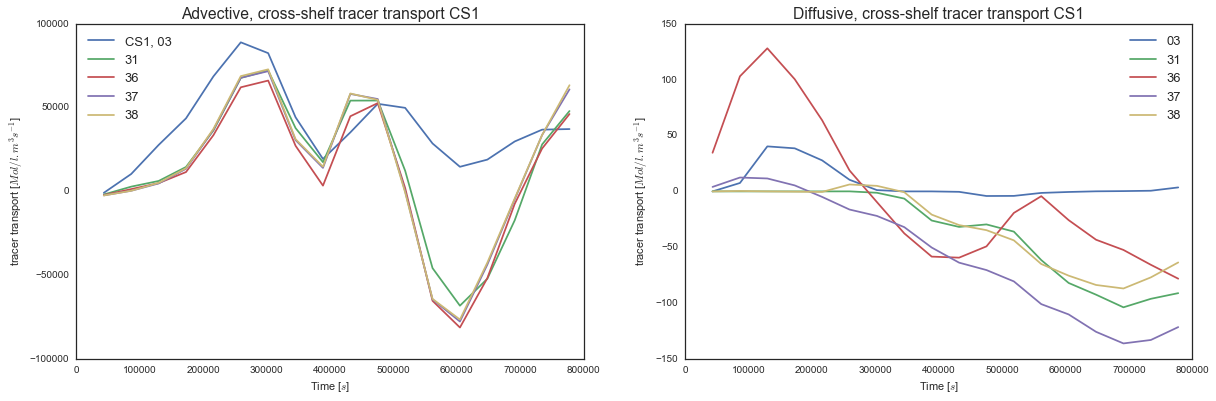

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux03).plot(ax=ax[0], label = 'CS1, 03')
(advCS1_flux31).plot(ax=ax[0], label = '31')
(advCS1_flux36).plot(ax=ax[0], label = '36')
(advCS1_flux37).plot(ax=ax[0], label = '37')
(advCS1_flux38).plot(ax=ax[0], label = '38') 


(difCS1_flux03).plot(ax=ax[1], label = '03')
(difCS1_flux31).plot(ax=ax[1], label = '31')
(difCS1_flux36).plot(ax=ax[1], label = '36')
(difCS1_flux37).plot(ax=ax[1], label = '37')
(difCS1_flux38).plot(ax=ax[1], label = '38') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS1')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS1')

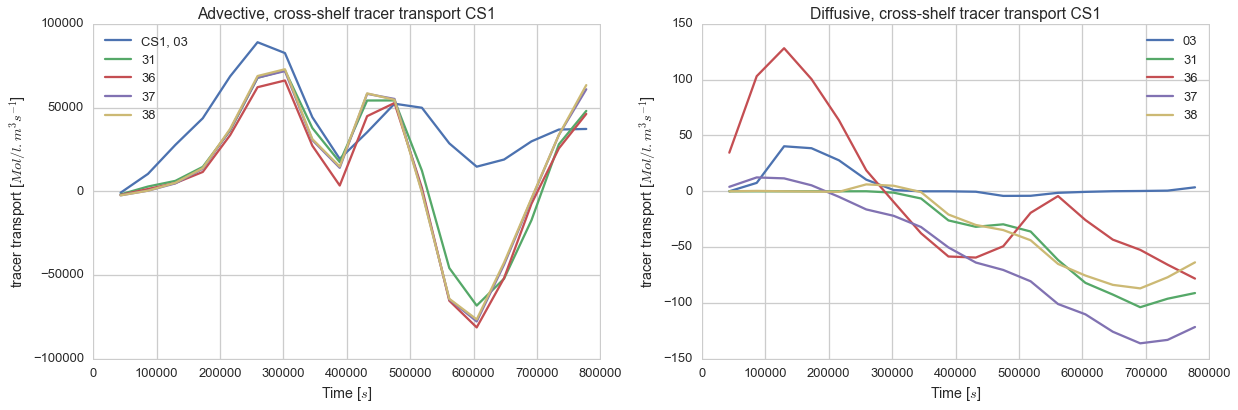

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux03).plot(ax=ax[0], label = 'CS1, 03')
(advCS1_flux31).plot(ax=ax[0], label = '31')
(advCS1_flux36).plot(ax=ax[0], label = '36')
(advCS1_flux37).plot(ax=ax[0], label = '37')
(advCS1_flux38).plot(ax=ax[0], label = '38') 


(difCS1_flux03).plot(ax=ax[1], label = '03')
(difCS1_flux31).plot(ax=ax[1], label = '31')
(difCS1_flux36).plot(ax=ax[1], label = '36')
(difCS1_flux37).plot(ax=ax[1], label = '37')
(difCS1_flux38).plot(ax=ax[1], label = '38') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS1')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS1')

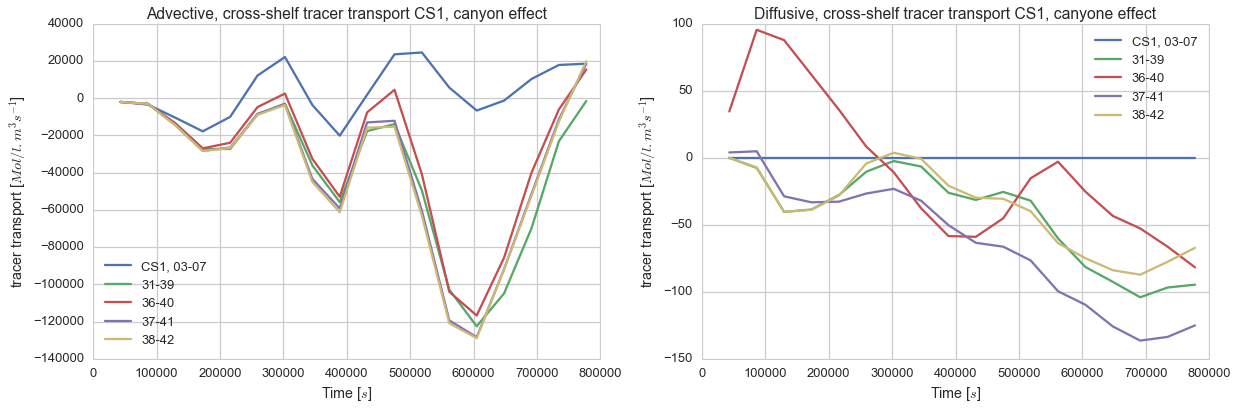

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux03-advCS1_flux07).plot(ax=ax[0], label = 'CS1, 03-07')
(advCS1_flux31-advCS1_flux39).plot(ax=ax[0], label = '31-39')
(advCS1_flux36-advCS1_flux40).plot(ax=ax[0], label = '36-40')
(advCS1_flux37-advCS1_flux41).plot(ax=ax[0], label = '37-41')
(advCS1_flux38-advCS1_flux42).plot(ax=ax[0], label = '38-42') 


(difCS1_flux03-difCS1_flux03).plot(ax=ax[1], label = 'CS1, 03-07')
(difCS1_flux31-difCS1_flux03).plot(ax=ax[1], label = '31-39')
(difCS1_flux36-difCS1_flux03).plot(ax=ax[1], label = '36-40')
(difCS1_flux37-difCS1_flux03).plot(ax=ax[1], label = '37-41')
(difCS1_flux38-difCS1_flux03).plot(ax=ax[1], label = '38-42') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS1, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS1, canyone effect')

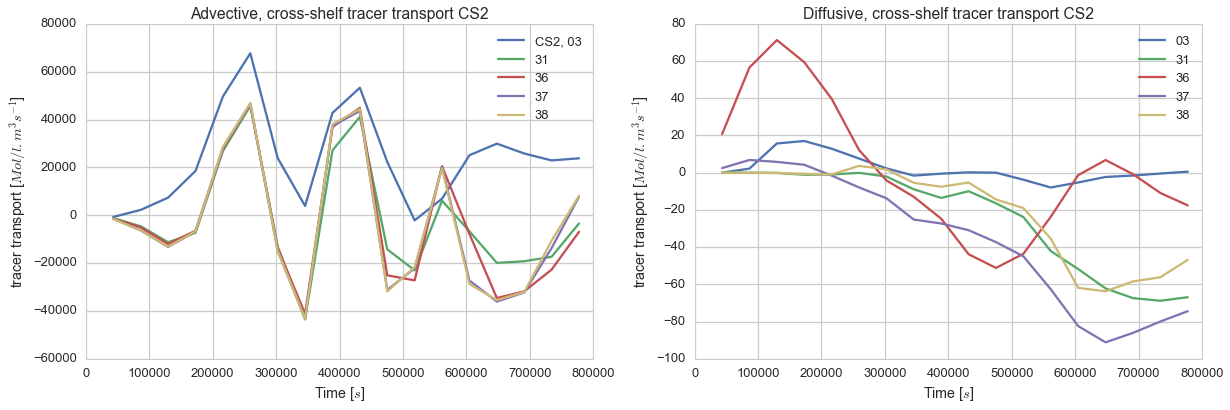

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS2_flux03).plot(ax=ax[0], label = 'CS2, 03')
(advCS2_flux31).plot(ax=ax[0], label = '31')
(advCS2_flux36).plot(ax=ax[0], label = '36')
(advCS2_flux37).plot(ax=ax[0], label = '37')
(advCS2_flux38).plot(ax=ax[0], label = '38') 


(difCS2_flux03).plot(ax=ax[1], label = '03')
(difCS2_flux31).plot(ax=ax[1], label = '31')
(difCS2_flux36).plot(ax=ax[1], label = '36')
(difCS2_flux37).plot(ax=ax[1], label = '37')
(difCS2_flux38).plot(ax=ax[1], label = '38') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS2')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS2')

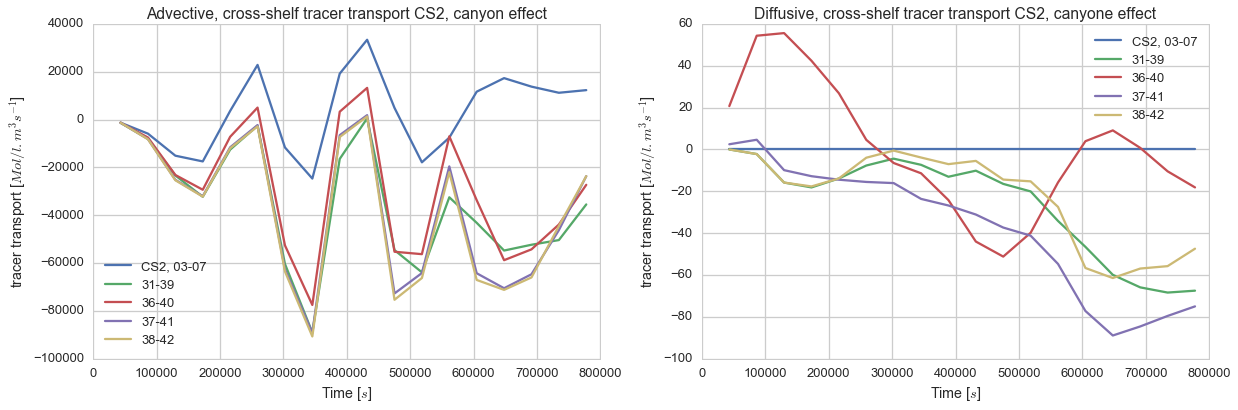

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS2_flux03-advCS2_flux07).plot(ax=ax[0], label = 'CS2, 03-07')
(advCS2_flux31-advCS2_flux39).plot(ax=ax[0], label = '31-39')
(advCS2_flux36-advCS2_flux40).plot(ax=ax[0], label = '36-40')
(advCS2_flux37-advCS2_flux41).plot(ax=ax[0], label = '37-41')
(advCS2_flux38-advCS2_flux42).plot(ax=ax[0], label = '38-42') 


(difCS2_flux03-difCS2_flux03).plot(ax=ax[1], label = 'CS2, 03-07')
(difCS2_flux31-difCS2_flux03).plot(ax=ax[1], label = '31-39')
(difCS2_flux36-difCS2_flux03).plot(ax=ax[1], label = '36-40')
(difCS2_flux37-difCS2_flux03).plot(ax=ax[1], label = '37-41')
(difCS2_flux38-difCS2_flux03).plot(ax=ax[1], label = '38-42') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS2, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS2, canyone effect')

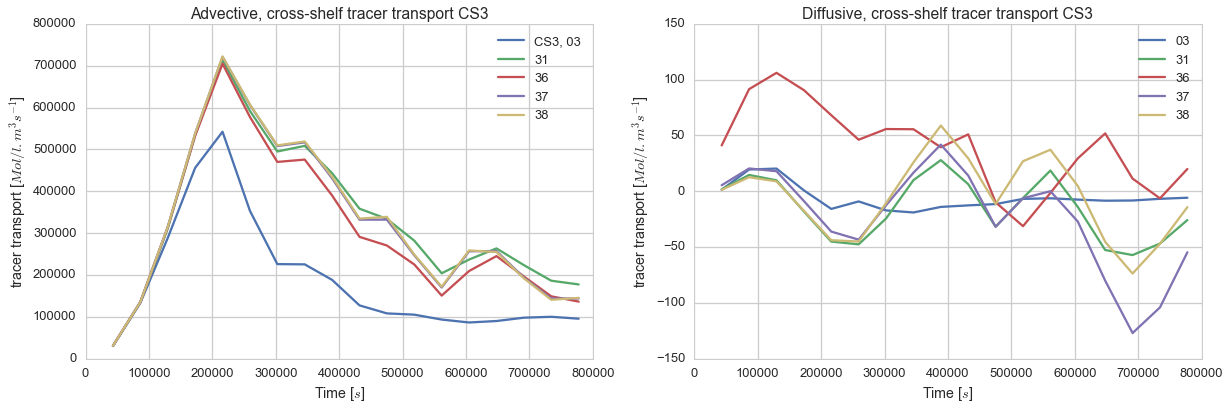

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS3_flux03).plot(ax=ax[0], label = 'CS3, 03')
(advCS3_flux31).plot(ax=ax[0], label = '31')
(advCS3_flux36).plot(ax=ax[0], label = '36')
(advCS3_flux37).plot(ax=ax[0], label = '37')
(advCS3_flux38).plot(ax=ax[0], label = '38') 


(difCS3_flux03).plot(ax=ax[1], label = '03')
(difCS3_flux31).plot(ax=ax[1], label = '31')
(difCS3_flux36).plot(ax=ax[1], label = '36')
(difCS3_flux37).plot(ax=ax[1], label = '37')
(difCS3_flux38).plot(ax=ax[1], label = '38') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS3')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS3')

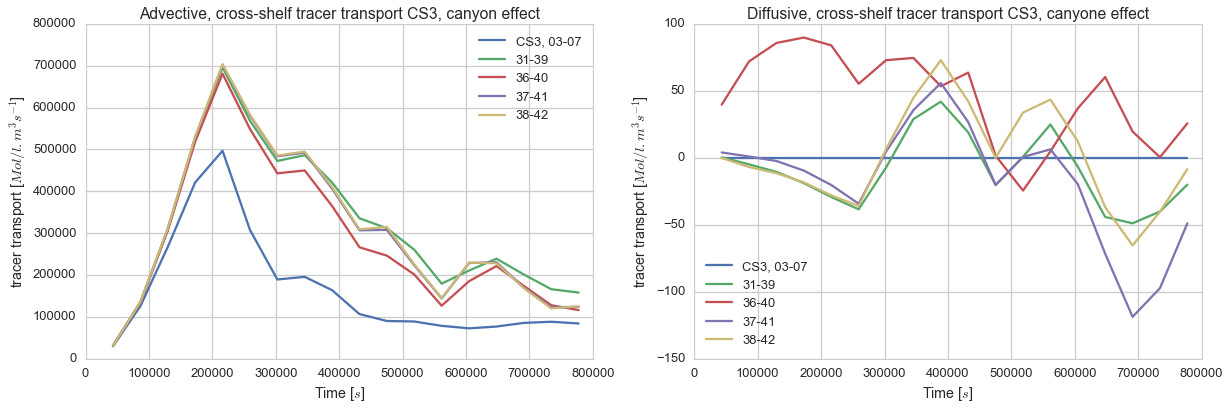

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS3_flux03-advCS3_flux07).plot(ax=ax[0], label = 'CS3, 03-07')
(advCS3_flux31-advCS3_flux39).plot(ax=ax[0], label = '31-39')
(advCS3_flux36-advCS3_flux40).plot(ax=ax[0], label = '36-40')
(advCS3_flux37-advCS3_flux41).plot(ax=ax[0], label = '37-41')
(advCS3_flux38-advCS3_flux42).plot(ax=ax[0], label = '38-42') 


(difCS3_flux03-difCS3_flux03).plot(ax=ax[1], label = 'CS3, 03-07')
(difCS3_flux31-difCS3_flux03).plot(ax=ax[1], label = '31-39')
(difCS3_flux36-difCS3_flux03).plot(ax=ax[1], label = '36-40')
(difCS3_flux37-difCS3_flux03).plot(ax=ax[1], label = '37-41')
(difCS3_flux38-difCS3_flux03).plot(ax=ax[1], label = '38-42') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS3, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS3, canyone effect')

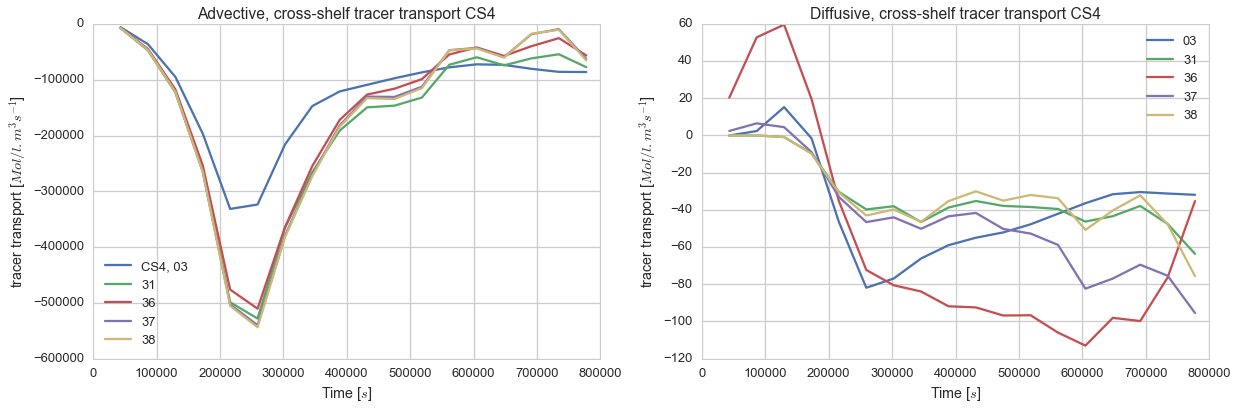

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS4_flux03).plot(ax=ax[0], label = 'CS4, 03')
(advCS4_flux31).plot(ax=ax[0], label = '31')
(advCS4_flux36).plot(ax=ax[0], label = '36')
(advCS4_flux37).plot(ax=ax[0], label = '37')
(advCS4_flux38).plot(ax=ax[0], label = '38') 


(difCS4_flux03).plot(ax=ax[1], label = '03')
(difCS4_flux31).plot(ax=ax[1], label = '31')
(difCS4_flux36).plot(ax=ax[1], label = '36')
(difCS4_flux37).plot(ax=ax[1], label = '37')
(difCS4_flux38).plot(ax=ax[1], label = '38') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS4')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS4')

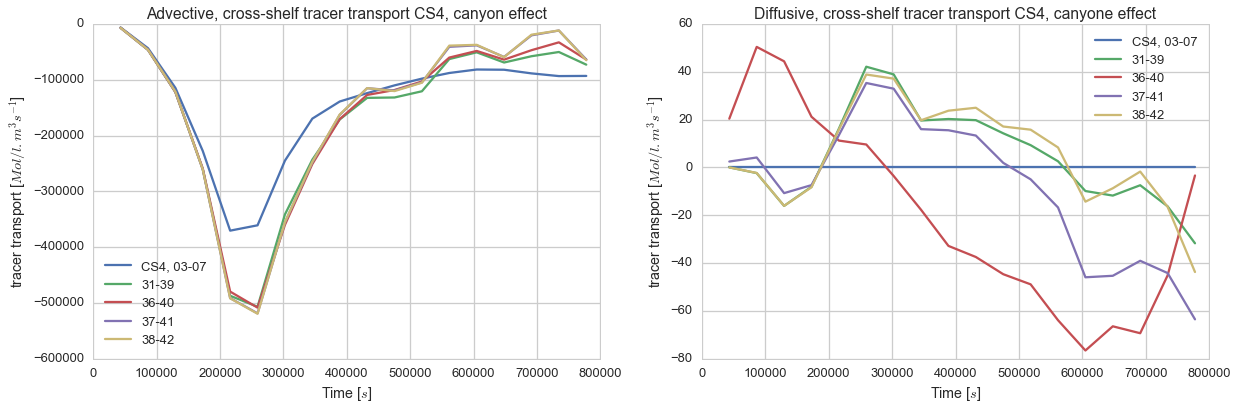

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS4_flux03-advCS4_flux07).plot(ax=ax[0], label = 'CS4, 03-07')
(advCS4_flux31-advCS4_flux39).plot(ax=ax[0], label = '31-39')
(advCS4_flux36-advCS4_flux40).plot(ax=ax[0], label = '36-40')
(advCS4_flux37-advCS4_flux41).plot(ax=ax[0], label = '37-41')
(advCS4_flux38-advCS4_flux42).plot(ax=ax[0], label = '38-42') 


(difCS4_flux03-difCS4_flux03).plot(ax=ax[1], label = 'CS4, 03-07')
(difCS4_flux31-difCS4_flux03).plot(ax=ax[1], label = '31-39')
(difCS4_flux36-difCS4_flux03).plot(ax=ax[1], label = '36-40')
(difCS4_flux37-difCS4_flux03).plot(ax=ax[1], label = '37-41')
(difCS4_flux38-difCS4_flux03).plot(ax=ax[1], label = '38-42') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS4, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS4, canyone effect')

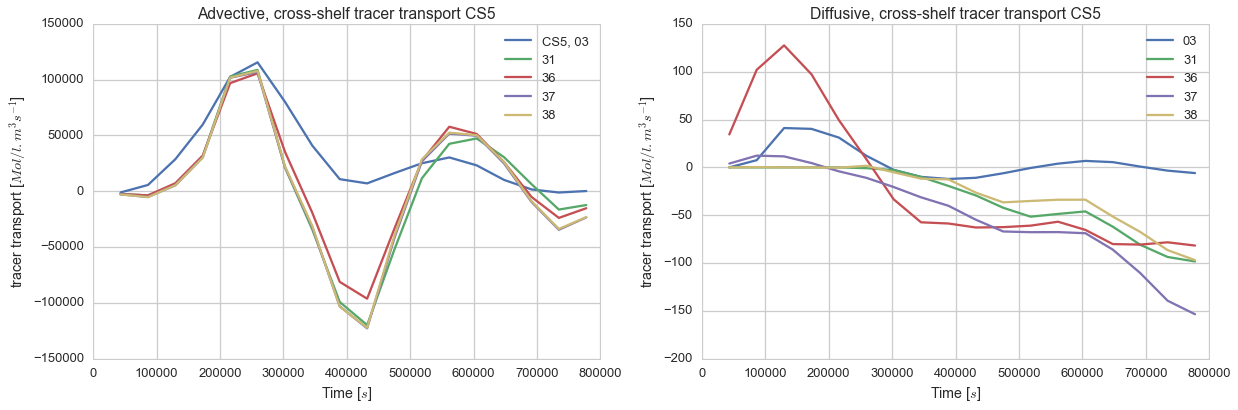

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS5_flux03).plot(ax=ax[0], label = 'CS5, 03')
(advCS5_flux31).plot(ax=ax[0], label = '31')
(advCS5_flux36).plot(ax=ax[0], label = '36')
(advCS5_flux37).plot(ax=ax[0], label = '37')
(advCS5_flux38).plot(ax=ax[0], label = '38') 


(difCS5_flux03).plot(ax=ax[1], label = '03')
(difCS5_flux31).plot(ax=ax[1], label = '31')
(difCS5_flux36).plot(ax=ax[1], label = '36')
(difCS5_flux37).plot(ax=ax[1], label = '37')
(difCS5_flux38).plot(ax=ax[1], label = '38') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS5')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS5')

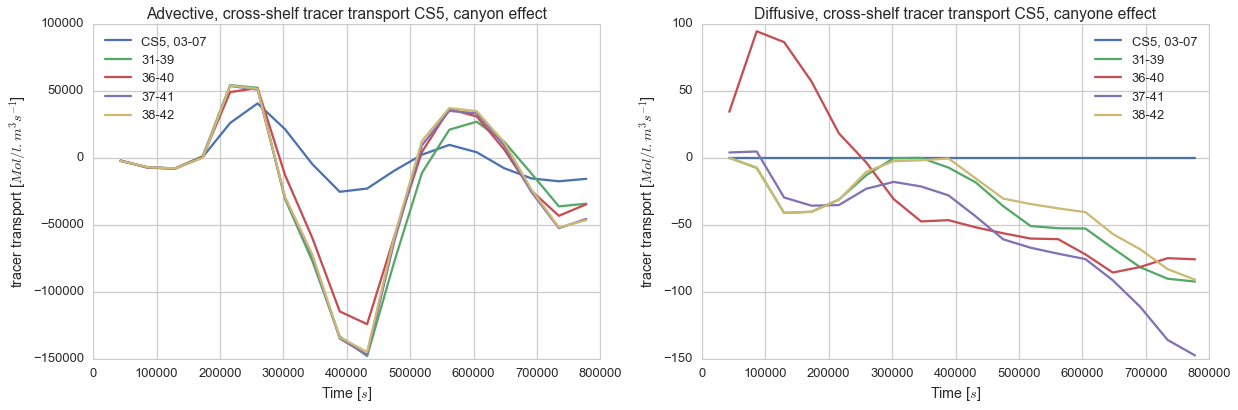

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS5_flux03-advCS5_flux07).plot(ax=ax[0], label = 'CS5, 03-07')
(advCS5_flux31-advCS5_flux39).plot(ax=ax[0], label = '31-39')
(advCS5_flux36-advCS5_flux40).plot(ax=ax[0], label = '36-40')
(advCS5_flux37-advCS5_flux41).plot(ax=ax[0], label = '37-41')
(advCS5_flux38-advCS5_flux42).plot(ax=ax[0], label = '38-42') 


(difCS5_flux03-difCS5_flux03).plot(ax=ax[1], label = 'CS5, 03-07')
(difCS5_flux31-difCS5_flux03).plot(ax=ax[1], label = '31-39')
(difCS5_flux36-difCS5_flux03).plot(ax=ax[1], label = '36-40')
(difCS5_flux37-difCS5_flux03).plot(ax=ax[1], label = '37-41')
(difCS5_flux38-difCS5_flux03).plot(ax=ax[1], label = '38-42') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS5, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS5, canyone effect')

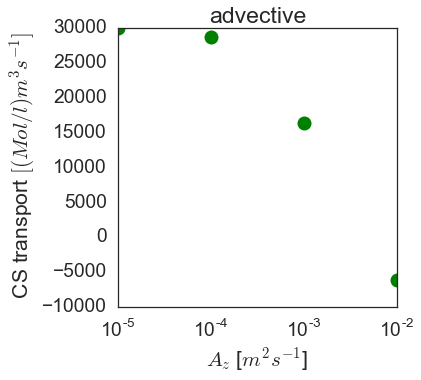

In [21]:
sns.set_context('poster',font_scale=1.2)

total03 = (advCS5_flux03 + advCS4_flux03 + advCS3_flux03 + advCS2_flux03 + advCS1_flux03-
           (advCS5_flux07 + advCS4_flux07 + advCS3_flux07 + advCS2_flux07 + advCS1_flux07)).isel(T=slice(6,19)).mean(dim='T')
total36 = (advCS5_flux36 + advCS4_flux36 + advCS3_flux36 + advCS2_flux36 + advCS1_flux36-
           (advCS5_flux40 + advCS4_flux40 + advCS3_flux40 + advCS2_flux40 + advCS1_flux40)).isel(T=slice(6,19)).mean(dim='T')
total37 = (advCS5_flux37 + advCS4_flux37 + advCS3_flux37 + advCS2_flux37 + advCS1_flux37-
           (advCS5_flux41 + advCS4_flux41 + advCS3_flux41 + advCS2_flux41 + advCS1_flux41)).isel(T=slice(6,19)).mean(dim='T')
total38 = (advCS5_flux38 + advCS4_flux38 + advCS3_flux38 + advCS2_flux38 + advCS1_flux38-
           (advCS5_flux42 + advCS4_flux42 + advCS3_flux42 + advCS2_flux42 + advCS1_flux42)).isel(T=slice(6,19)).mean(dim='T')

datasets = [total03,total36,total37,total38]

Az = [1E-2,1E-3,1E-4,1E-5]

fig,ax = plt.subplots(1,1,figsize=(5,5))

for data,ii in zip(datasets,range(len(Az)+1)):
    
    ax.plot(Az[ii],data,'go',markersize=14)
    ax.set_xscale("log", nonposx='clip')
    
ax.set_ylabel(' CS transport $[(Mol/l)m^3s^{-1}]$')
ax.set_xlabel('$A_z$ [$m^2s^{-1}$]')
ax.set_title('advective')


plt.tight_layout
plt.plot()

fig.savefig('adv_trac_trans_visc_FDSE.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


NameError: name 'difCS5_flux03' is not defined

## Alongshore transports

### Downstream, near canyon rim

In [ ]:
advAS1c_flux03 = calc_trac_transport_AS(unstagger_xarray(flux03.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux03 = calc_trac_transport_AS(unstagger_xarray(flux03.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux03 = calc_trac_transport_AS(unstagger_xarray(flux03.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux03 = calc_trac_transport_AS(unstagger_xarray(flux03.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux03 = calc_trac_transport_AS(unstagger_xarray(flux03.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux03 = calc_trac_transport_AS(unstagger_xarray(flux03.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux31 = calc_trac_transport_AS(unstagger_xarray(flux31.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux31 = calc_trac_transport_AS(unstagger_xarray(flux31.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux31 = calc_trac_transport_AS(unstagger_xarray(flux31.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux31 = calc_trac_transport_AS(unstagger_xarray(flux31.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux31 = calc_trac_transport_AS(unstagger_xarray(flux31.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux31 = calc_trac_transport_AS(unstagger_xarray(flux31.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux36 = calc_trac_transport_AS(unstagger_xarray(flux36.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux36 = calc_trac_transport_AS(unstagger_xarray(flux36.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux36 = calc_trac_transport_AS(unstagger_xarray(flux36.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux36 = calc_trac_transport_AS(unstagger_xarray(flux36.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux36 = calc_trac_transport_AS(unstagger_xarray(flux36.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux36 = calc_trac_transport_AS(unstagger_xarray(flux36.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux37 = calc_trac_transport_AS(unstagger_xarray(flux37.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux37 = calc_trac_transport_AS(unstagger_xarray(flux37.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux37 = calc_trac_transport_AS(unstagger_xarray(flux37.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux37 = calc_trac_transport_AS(unstagger_xarray(flux37.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux37 = calc_trac_transport_AS(unstagger_xarray(flux37.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux37 = calc_trac_transport_AS(unstagger_xarray(flux37.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux38 = calc_trac_transport_AS(unstagger_xarray(flux38.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux38 = calc_trac_transport_AS(unstagger_xarray(flux38.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux38 = calc_trac_transport_AS(unstagger_xarray(flux38.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux38 = calc_trac_transport_AS(unstagger_xarray(flux38.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux38 = calc_trac_transport_AS(unstagger_xarray(flux38.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux38 = calc_trac_transport_AS(unstagger_xarray(flux38.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')


In [ ]:
advAS1c_flux07 = calc_trac_transport_AS(unstagger_xarray(flux07.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux07 = calc_trac_transport_AS(unstagger_xarray(flux07.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux07 = calc_trac_transport_AS(unstagger_xarray(flux07.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux07 = calc_trac_transport_AS(unstagger_xarray(flux07.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux07 = calc_trac_transport_AS(unstagger_xarray(flux07.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux07 = calc_trac_transport_AS(unstagger_xarray(flux07.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux39 = calc_trac_transport_AS(unstagger_xarray(flux39.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux39 = calc_trac_transport_AS(unstagger_xarray(flux39.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux39 = calc_trac_transport_AS(unstagger_xarray(flux39.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux39 = calc_trac_transport_AS(unstagger_xarray(flux39.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux39 = calc_trac_transport_AS(unstagger_xarray(flux39.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux39 = calc_trac_transport_AS(unstagger_xarray(flux39.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux40 = calc_trac_transport_AS(unstagger_xarray(flux40.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux40 = calc_trac_transport_AS(unstagger_xarray(flux40.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux40 = calc_trac_transport_AS(unstagger_xarray(flux40.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux40 = calc_trac_transport_AS(unstagger_xarray(flux40.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux40 = calc_trac_transport_AS(unstagger_xarray(flux40.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux40 = calc_trac_transport_AS(unstagger_xarray(flux40.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux41 = calc_trac_transport_AS(unstagger_xarray(flux41.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux41 = calc_trac_transport_AS(unstagger_xarray(flux41.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux41 = calc_trac_transport_AS(unstagger_xarray(flux41.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux41 = calc_trac_transport_AS(unstagger_xarray(flux41.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux41 = calc_trac_transport_AS(unstagger_xarray(flux41.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux41 = calc_trac_transport_AS(unstagger_xarray(flux41.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux42 = calc_trac_transport_AS(unstagger_xarray(flux42.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux42 = calc_trac_transport_AS(unstagger_xarray(flux42.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux42 = calc_trac_transport_AS(unstagger_xarray(flux42.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux42 = calc_trac_transport_AS(unstagger_xarray(flux42.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux42 = calc_trac_transport_AS(unstagger_xarray(flux42.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux42 = calc_trac_transport_AS(unstagger_xarray(flux42.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS1c_flux03).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 03')
(advAS1c_flux31).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 31')
(advAS1c_flux36).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 36')
(advAS1c_flux37).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 37')
(advAS1c_flux38).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 38')

(difAS1c_flux03).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 03')
(difAS1c_flux31).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 31')
(difAS1c_flux36).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 36')
(difAS1c_flux37).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 37')
(difAS1c_flux38).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 38')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS1c_flux03-advAS1c_flux07).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 03-07')
(advAS1c_flux31-advAS1c_flux39).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 31-39')
(advAS1c_flux36-advAS1c_flux40).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 36-40')
(advAS1c_flux37-advAS1c_flux41).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 37-41')
(advAS1c_flux38-advAS1c_flux42).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 38-42')

(difAS1c_flux03-difAS1c_flux07).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 03-07')
(difAS1c_flux31-difAS1c_flux39).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 31-39')
(difAS1c_flux36-difAS1c_flux40).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 36-40')
(difAS1c_flux37-difAS1c_flux41).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 37-41')
(difAS1c_flux38-difAS1c_flux42).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 38-42')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS2c_flux03).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 03')
(advAS2c_flux31).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 31')
(advAS2c_flux36).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 36')
(advAS2c_flux37).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 37')
(advAS2c_flux38).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 38')

(difAS2c_flux03).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 03')
(difAS2c_flux31).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 31')
(difAS2c_flux36).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 36')
(difAS2c_flux37).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 37')
(difAS2c_flux38).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 38')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS2c_flux03-advAS2c_flux07).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 03-07')
(advAS2c_flux31-advAS2c_flux39).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 31-39')
(advAS2c_flux36-advAS2c_flux40).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 36-40')
(advAS2c_flux37-advAS2c_flux41).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 37-41')
(advAS2c_flux38-advAS2c_flux42).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 38-42')

(difAS2c_flux03-difAS2c_flux07).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 03-07')
(difAS2c_flux31-difAS2c_flux39).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 31-39')
(difAS2c_flux36-difAS2c_flux40).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 36-40')
(difAS2c_flux37-difAS2c_flux41).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 37-41')
(difAS2c_flux38-difAS2c_flux42).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 38-42')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS3c_flux03).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 03')
(advAS3c_flux31).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 31')
(advAS3c_flux36).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 36')
(advAS3c_flux37).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 37')
(advAS3c_flux38).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 38')

(difAS3c_flux03).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 03')
(difAS3c_flux31).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 31')
(difAS3c_flux36).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 36')
(difAS3c_flux37).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 37')
(difAS3c_flux38).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 38')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS3c_flux03-advAS3c_flux07).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 03-07')
(advAS3c_flux31-advAS3c_flux39).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 31-39')
(advAS3c_flux36-advAS3c_flux40).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 36-40')
(advAS3c_flux37-advAS3c_flux41).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 37-41')
(advAS3c_flux38-advAS3c_flux42).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 38-42')

(difAS3c_flux03-difAS3c_flux07).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 03-07')
(difAS3c_flux31-difAS3c_flux39).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 31-39')
(difAS3c_flux36-difAS3c_flux40).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 36-40')
(difAS3c_flux37-difAS3c_flux41).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 37-41')
(difAS3c_flux38-difAS3c_flux42).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 38-42')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

### Vertical transport at shelf break depth (only within the canyon)


In [22]:
advVR1_flux03 = (unstagger_xarray(flux03.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')
difIVR1_flux03 = (unstagger_xarray(flux03.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')
difEVR1_flux03 = (unstagger_xarray(flux03.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')

advVR1_flux31 = (unstagger_xarray(flux31.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')
difIVR1_flux31 = (unstagger_xarray(flux31.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')
difEVR1_flux31 = (unstagger_xarray(flux31.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')

advVR1_flux36 = (unstagger_xarray(flux36.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')
difIVR1_flux36 = (unstagger_xarray(flux36.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')
difEVR1_flux36 = (unstagger_xarray(flux36.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')

advVR1_flux37 = (unstagger_xarray(flux37.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')
difIVR1_flux37 = (unstagger_xarray(flux37.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')
difEVR1_flux37 = (unstagger_xarray(flux37.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')

advVR1_flux38 = (unstagger_xarray(flux38.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')
difIVR1_flux38 = (unstagger_xarray(flux38.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')
difEVR1_flux38 = (unstagger_xarray(flux38.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(120,240), Y=slice(227,267))).sum(dim='X')



In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

(advVR1_flux03).sum(dim='Y').plot(ax=ax[0], label = 'adv03')
(advVR1_flux31).sum(dim='Y').plot(ax=ax[0], label = 'adv31')
(advVR1_flux36).sum(dim='Y').plot(ax=ax[0], label = 'adv36')
(advVR1_flux37).sum(dim='Y').plot(ax=ax[0], label = 'adv37')
(advVR1_flux38).sum(dim='Y').plot(ax=ax[0], label = 'adv38')



(difIVR1_flux03).sum(dim='Y').plot(ax=ax[1], label = 'dif I03')
(difIVR1_flux31).sum(dim='Y').plot(ax=ax[1], label = 'dif I31')
(difIVR1_flux36).sum(dim='Y').plot(ax=ax[1], label = 'dif I36')
(difIVR1_flux37).sum(dim='Y').plot(ax=ax[1], label = 'dif I37')
(difIVR1_flux38).sum(dim='Y').plot(ax=ax[1], label = 'dif I38')


(difEVR1_flux03).sum(dim='Y').plot(ax=ax[2], label = 'dif E03')
(difEVR1_flux31).sum(dim='Y').plot(ax=ax[2], label = 'dif E31')
(difEVR1_flux36).sum(dim='Y').plot(ax=ax[2], label = 'dif E36')
(difEVR1_flux37).sum(dim='Y').plot(ax=ax[2], label = 'dif E37')
(difEVR1_flux38).sum(dim='Y').plot(ax=ax[2], label = 'dif E38')


ax[0] = fig_looks(ax[0],title='Advective, vert tracer transport canyon effect ')
ax[1] = fig_looks(ax[1],title='Implicit Diff., vert tracer transport canyon effect ')
ax[1] = fig_looks(ax[2],title='Explicit Diff., vert tracer transport canyon effect ')

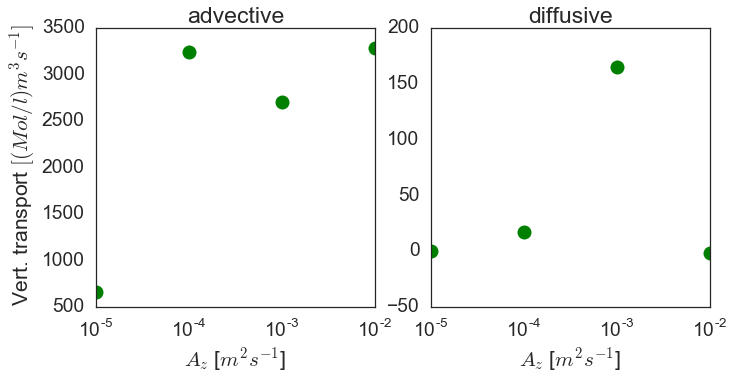

In [29]:
sns.set_context('poster',font_scale=1.2)


datasetsA = [advVR1_flux38,advVR1_flux36,advVR1_flux37,advVR1_flux03]
datasetsD = [difIVR1_flux38+difEVR1_flux38,difIVR1_flux36+difEVR1_flux36,
             difIVR1_flux37+difEVR1_flux37,difIVR1_flux03+difEVR1_flux03]

Az = [1E-2,1E-3,1E-4,1E-5]

fig,ax = plt.subplots(1,2,figsize=(11,5))

for data,dataV,ii in zip(datasetsA,datasetsD,range(len(Az)+1)):
    
    ax[0].plot(Az[ii],data[6:].mean(),'go',markersize=14)
    ax[0].set_xscale("log", nonposx='clip')
    ax[1].plot(Az[ii],dataV[6:].mean(),'go',markersize=14)
    ax[1].set_xscale("log", nonposx='clip')
    
ax[0].set_ylabel(' Vert. transport $[(Mol/l)m^3s^{-1}]$')
ax[0].set_xlabel('$A_z$ [$m^2s^{-1}$]')
ax[0].set_title('advective')


ax[1].set_xlabel('$A_z$ [$m^2s^{-1}$]')
ax[1].set_title('diffusive')


plt.plot()

fig.savefig('adv_trac_vert_visc_FDSE.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')
